In [ ]:
Name:Mandala Hemanth Kumar
Reg.No:AIE23115
GitHub link:https://github.com/Hemanth-2809/Machine-Learning

1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If 
your data deals with multiple classes, you can take any two classes. Steps below (refer below 
diagram for understanding): 
• Calculate the mean for each class (also called as class centroid) 
(Suggestion: You may use numpy.mean() function for finding the average vector for all 
vectors in a given class. Please define the axis property appropriately to use this function. EX: 
feat_vecs.mean(axis=0)) 
• Calculate spread (standard deviation) for each class 
(Suggestion: You may use numpy.std() function for finding the standard deviation vector 
for all vectors in a given class. Please define the axis property appropriately to use this 
function.) 
• Calculate the distance between mean vectors between classes 
(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean 
distance between two centroids.)

Centroid of Obesity_Type_I: [25.88494073  1.69380389 92.87019836]
Centroid of Obesity_Type_II: [ 28.23378532   1.77179531 115.30531125]
Centroid of Obesity_Type_III: [ 23.49555397   1.68755949 120.94111437]
Spread of Obesity_Type_I: [ 7.74464382  0.09827408 11.46961328]
Spread of Obesity_Type_II: [4.85999616 0.07260031 8.01079967]
Spread of Obesity_Type_III: [ 2.76005465  0.06516212 15.50823699]
Interclass Distance between Obesity_Type_I and Obesity_Type_II: 22.5579
Interclass Distance between Obesity_Type_I and Obesity_Type_III: 28.1724
Interclass Distance between Obesity_Type_II and Obesity_Type_III: 7.3634


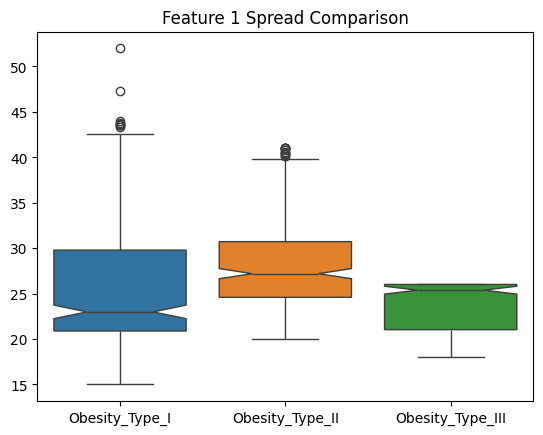

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Obesity prediction.csv")

X = df[['Age', 'Height', 'Weight']].values
y = df['Obesity'].values

class_0 = X[y == 'Obesity_Type_I']
class_1 = X[y == 'Obesity_Type_II']
class_2 = X[y == 'Obesity_Type_III']

centroid_0 = np.mean(class_0, axis=0)
centroid_1 = np.mean(class_1, axis=0)
centroid_2 = np.mean(class_2, axis=0)

spread_0 = np.std(class_0, axis=0)
spread_1 = np.std(class_1, axis=0)
spread_2 = np.std(class_2, axis=0)

interclass_distance_01 = np.linalg.norm(centroid_0 - centroid_1)
interclass_distance_02 = np.linalg.norm(centroid_0 - centroid_2)
interclass_distance_12 = np.linalg.norm(centroid_1 - centroid_2)

print(f"Centroid of Obesity_Type_I: {centroid_0}")
print(f"Centroid of Obesity_Type_II: {centroid_1}")
print(f"Centroid of Obesity_Type_III: {centroid_2}")
print(f"Spread of Obesity_Type_I: {spread_0}")
print(f"Spread of Obesity_Type_II: {spread_1}")
print(f"Spread of Obesity_Type_III: {spread_2}")
print(f"Interclass Distance between Obesity_Type_I and Obesity_Type_II: {interclass_distance_01:.4f}")
print(f"Interclass Distance between Obesity_Type_I and Obesity_Type_III: {interclass_distance_02:.4f}")
print(f"Interclass Distance between Obesity_Type_II and Obesity_Type_III: {interclass_distance_12:.4f}")

sns.boxplot(data=[class_0[:, 0], class_1[:, 0], class_2[:, 0]], notch=True)
plt.xticks([0, 1, 2], ['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])
plt.title("Feature 1 Spread Comparison")
plt.show()


2. Take any feature from your dataset. Observe the density pattern for that feature by plotting the 
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and 
variance from the available data.

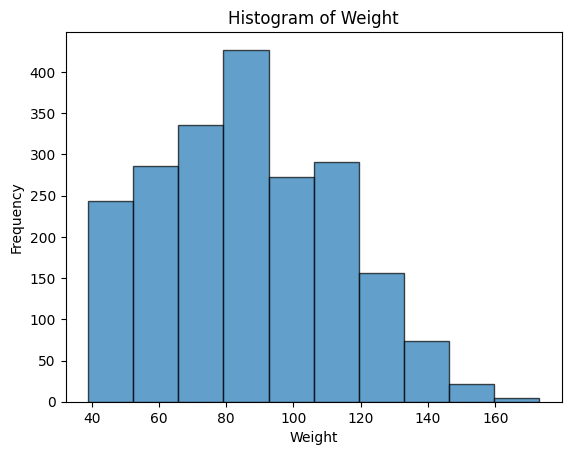

Mean of SepalLengthCm: 86.5861
Variance of SepalLengthCm: 685.6525


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("Obesity prediction.csv")

feature = df['Weight']


mean_value = np.mean(feature)
variance_value = np.var(feature)


plt.hist(feature, bins=10, edgecolor='black', alpha=0.7)
plt.title("Histogram of Weight")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.show()


print(f"Mean of SepalLengthCm: {mean_value:.4f}")
print(f"Variance of SepalLengthCm: {variance_value:.4f}")


3.Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 
to 10. Make a plot of the distance and observe the nature of this graph. 

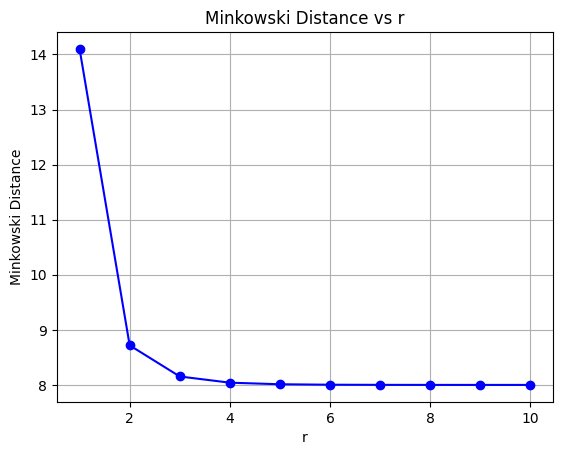

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Obesity prediction.csv")
df_numeric = df.select_dtypes(include=[np.number])

x = df_numeric.iloc[0].values
y = df_numeric.iloc[1].values

def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y) ** r) ** (1 / r)

r_values = np.arange(1, 11)
distances = [minkowski_distance(x, y, r) for r in r_values]

plt.plot(r_values, distances, marker='o', linestyle='-', color='b')
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.grid(True)
plt.show()

4. Divide dataset in your project into two parts – train & test set. To accomplish this, use the train
test_split() function available in SciKit. See below sample code for help: 

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Obesity prediction.csv")

X = df.drop(columns=['Obesity'])
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Testing set shape: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set shape: X_train = (1477, 16), y_train = (1477,)
Testing set shape: X_test = (634, 16), y_test = (634,)


5. Train a kNN classifier (k =3) using the training set obtained from above exercise. Following code 
for help

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("Obesity prediction.csv")

df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

X = df.drop(columns=['Obesity'])
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of kNN classifier with k=3: {accuracy:.2f}")


Accuracy of kNN classifier with k=3: 0.87


C:\Users\heman\PycharmProjects\ml_practice\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\heman\PycharmProjects\ml_practice\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\heman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\heman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\heman\AppData\Local\Programs\Python\Python310\lib\subprocess.py", 

6.. Test the accuracy of the kNN using the test set obtained from above exercise. Following code for 
help.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("Obesity prediction.csv")

df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

X = df.drop(columns=['Obesity'])
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy of kNN classifier with k=3: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy of kNN classifier with k=3: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88        86
           1       0.77      0.51      0.61        93
           2       0.89      0.94      0.91       102
           3       0.98      0.97      0.97        88
           4       0.97      1.00      0.98        98
           5       0.77      0.85      0.81        88
           6       0.88      0.86      0.87        79

    accuracy                           0.87       634
   macro avg       0.87      0.87      0.86       634
weighted avg       0.87      0.87      0.86       634



7. Use the predict() function to study the prediction behavior of the classifier for test vectors.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Obesity prediction.csv")

df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

X = df.drop(columns=['Obesity'])
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

y_pred = neigh.predict(X_test)

print("Predictions for the test set:\n", y_pred)

test_vector = X_test.iloc[0].values.reshape(1, -1)
predicted_class = neigh.predict(test_vector)

print(f"Predicted class for the test vector: {predicted_class[0]}")


Predictions for the test set:
 [0 4 0 0 5 0 3 5 2 0 2 4 3 3 4 6 4 3 2 6 2 5 4 2 1 6 6 4 4 0 4 5 6 0 0 4 2
 5 1 1 0 3 1 5 5 0 3 1 2 3 5 1 1 5 0 6 3 3 2 3 1 4 6 0 3 2 6 4 0 0 2 6 0 0
 5 3 3 5 4 3 1 2 3 3 2 2 6 6 1 6 2 3 0 5 2 0 5 2 5 3 2 2 4 2 1 2 0 4 4 3 2
 1 2 1 0 2 2 3 6 1 4 3 2 6 2 3 2 2 4 3 4 3 1 2 6 4 0 4 1 2 5 6 0 1 1 3 2 4
 0 2 0 0 1 3 2 5 6 5 0 0 5 1 2 0 3 0 2 5 5 6 1 6 3 4 2 6 2 6 2 5 0 3 0 5 3
 2 5 4 3 3 0 4 0 1 4 5 3 2 4 0 3 4 4 4 1 4 5 5 2 4 1 2 0 2 3 0 5 3 3 2 4 6
 3 5 3 6 0 4 1 5 1 4 5 5 1 2 2 2 2 0 6 6 5 2 2 2 5 2 2 0 5 2 0 6 5 6 2 3 2
 2 4 4 5 2 2 4 4 1 5 4 2 4 2 2 3 2 3 4 3 1 0 5 6 4 4 5 2 6 0 3 2 5 0 2 0 5
 3 3 6 2 1 5 0 0 5 2 2 5 6 4 5 3 0 4 5 6 2 4 6 2 0 1 4 0 1 4 2 2 4 0 1 5 3
 4 4 5 2 0 0 0 2 4 6 2 4 3 5 2 5 2 6 4 6 0 0 6 6 6 5 6 6 3 2 3 3 4 2 6 5 4
 0 2 0 3 2 5 0 0 2 2 6 6 5 0 4 5 4 4 5 2 3 1 4 6 3 5 0 4 5 4 1 0 1 5 2 0 0
 4 1 4 6 5 5 5 4 0 1 2 5 3 1 3 6 1 4 2 0 2 3 2 6 4 0 3 1 4 1 2 4 0 5 3 6 2
 3 4 5 0 4 2 6 3 6 5 3 3 5 5 4 5 5 6 3 3 4 3 3 4 6 2 3 5 0 3 6 0 1 2 

C:\Users\heman\PycharmProjects\ml_practice\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


8.. Make k = 1 to implement NN classifier and compare the results with kNN (k = 3). Vary k from 1 to 
11 and make an accuracy plot.

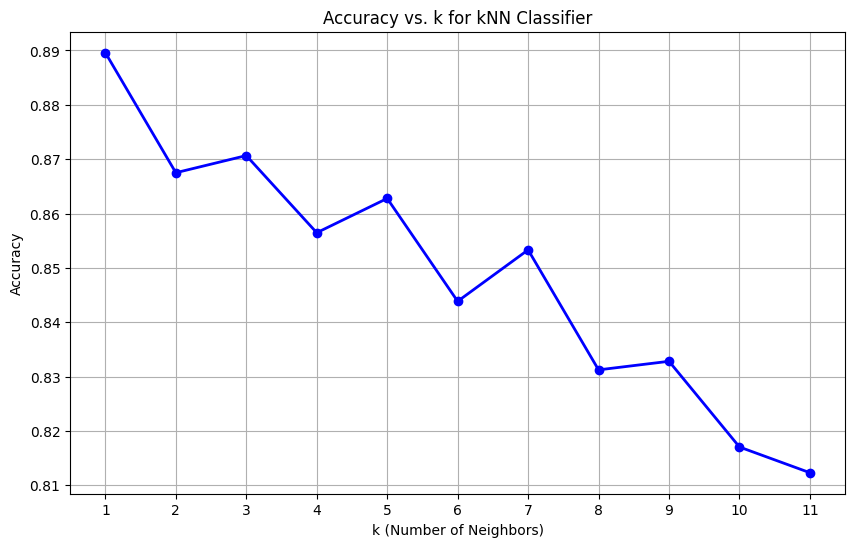

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Obesity prediction.csv")
df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

X = df.drop(columns=['Obesity'])
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

accuracy_values = []

for k in range(1, 12):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)
    accuracy = neigh.score(X_test, y_test)
    accuracy_values.append(accuracy)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), accuracy_values, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)
plt.title('Accuracy vs. k for kNN Classifier')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, 12))
plt.show()

9.Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
other performance metrics such as precision, recall and F1-Score measures for both training and test 
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit). 

Confusion Matrix for Training Data:
[[186   0   0   0   0   0   0]
 [ 22 146   2   0   0  17   7]
 [  0   0 242   0   1   0   6]
 [  0   0   3 204   2   0   0]
 [  0   0   0   1 225   0   0]
 [  0   6   5   0   0 185   6]
 [  0   2   4   1   0   0 204]]

Confusion Matrix for Test Data:
[[83  3  0  0  0  0  0]
 [18 47  3  0  0 19  6]
 [ 0  0 96  2  1  1  2]
 [ 0  0  1 85  2  0  0]
 [ 0  0  0  0 98  0  0]
 [ 1  9  2  0  0 75  1]
 [ 0  2  6  0  0  3 68]]

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       186
           1       0.95      0.75      0.84       194
           2       0.95      0.97      0.96       249
           3       0.99      0.98      0.98       209
           4       0.99      1.00      0.99       226
           5       0.92      0.92      0.92       202
           6       0.91      0.97      0.94       211

    accuracy                           0.94      1477
   macro avg  

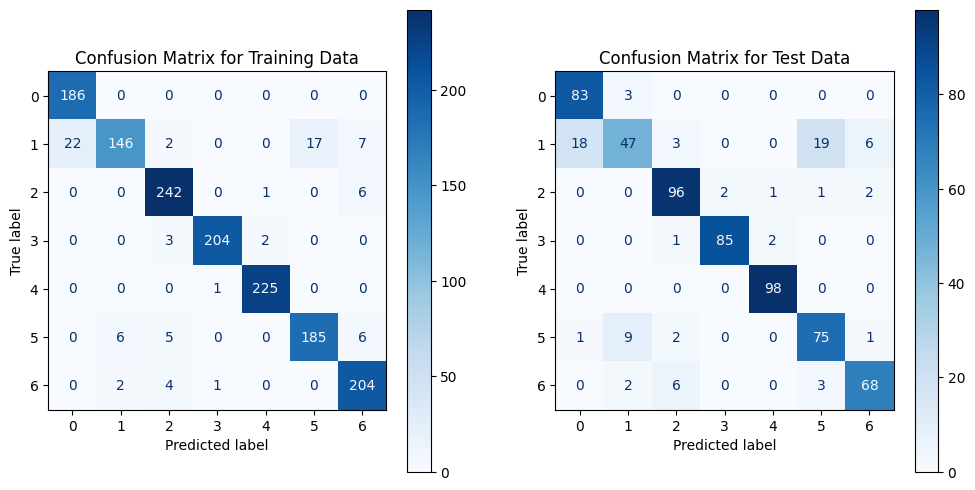

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

df = pd.read_csv("Obesity prediction.csv")
df = df.apply(lambda col: LabelEncoder().fit_transform(col) if col.dtype == 'object' else col)

X = df.drop(columns=['Obesity'])
y = df['Obesity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_train_pred = neigh.predict(X_train)
y_test_pred = neigh.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix for Training Data:")
print(cm_train)
print("\nConfusion Matrix for Test Data:")
print(cm_test)

print("\nClassification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=neigh.classes_).plot(ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix for Training Data')

ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=neigh.classes_).plot(ax=ax[1], cmap='Blues')
ax[1].set_title('Confusion Matrix for Test Data')

plt.show()